# OPERA Sentinel-1 Access and Explore

Authors: Harshini Girish (UAH), Rajat Shinde (UAH), Alex Mandel (DevSeed), Chuck Daniels (DevSeed)

Date:July 16, 2025

Description: In this tutorial aims to provide information and code to help users get started working with the OPERA Sentinel-1 Surface Displacement product using the MAAP. We will search for the data within NASA’s Common Metadata Repository (CMR)

## Run This Notebook

To access and run this tutorial within MAAP’s Algorithm Development Environment (ADE), please refer to the “Getting started with the MAAP” section of our documentation.

Disclaimer: it is highly recommended to run a tutorial within MAAP’s ADE, which already includes packages specific to MAAP, such as maap-py. Running the tutorial outside of the MAAP ADE may lead to errors.



## About the Data

The Level-3 OPERA Sentinel-1 Surface Displacement (DISP) product is generated through interferometric time-series analysis of Level-2 Coregistered Sentinel-1 Single Look Complex (CSLC) datasets. Using a hybrid Persistent Scatterer (PS) and Distributed Scatterer (DS) approach, this product quantifies Earth's surface displacement in the radar line-of-sight. The DISP products enable the detection of anthropogenic and natural surface changes, including subsidence, tectonic deformation, and landslides. 

The OPERA DISP suite comprises complementary datasets derived from Sentinel-1 and NISAR inputs, designated as DISP-S1 and DISP-NI, respectively. Each product, created per acquisition, adheres to a consistent structure, HDF5 file format, file-naming convention, and a 30 m spatial posting. This collection specifically includes DISP-S1 products, derived from Sentinel-1 data. 


Source: [OPERA Surface Displacement from Sentinel-1](https://cmr.earthdata.nasa.gov/search/concepts/C3294057315-ASF.html)

## Importing Packages

You can access data from Jupyter Notebook within your workspace. In your Jupyter Notebook, start by importing the `maap` package. Then invoke the `MAAP` constructor, setting the `maap_host` argument to `'api.maap-project.org'`


In [7]:
from maap.maap import MAAP
import xarray as xr
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import rasterio
# Initialize MAAP
maap = MAAP()


In [8]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


## Searching the Data

This performs a granule search using the `maap.searchGranule()` function on the OPERA Sentinel-1 displacement product collection.

In [9]:
collection = maap.searchCollection(
    cmr_host="cmr.earthdata.nasa.gov",
    short_name="OPERA_L3_DISP-S1_V1"
)
len(collection)

1

In [10]:

concept_id = collection[0]["concept-id"]
print(concept_id)


C3294057315-ASF


## Search Granules

Now that we have our collection ID, let’s search for granules within the collection. We’ll also add a temporal filter to our search. If you would like to search for granules without the temporal filter, simply comment out or remove the `temporal=date_range` line.

In [11]:
date_range = "2025-07-14T00:00:00Z,2025-07-15T23:59:59Z"

results = maap.searchGranule(
    temporal=date_range,
    concept_id="C2617126679-POCLOUD", 
    cmr_host="cmr.earthdata.nasa.gov"
)

print(f"Found {len(results)} granules")
for r in results:
    print(r["Granule"]["GranuleUR"])


Found 20 granules
OPERA_L3_DSWx-HLS_T56MNV_20250714T000016Z_20250716T090059Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56MLA_20250714T000016Z_20250716T090107Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LLQ_20250714T000128Z_20250716T090056Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LKR_20250714T000128Z_20250716T090105Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LMR_20250714T000128Z_20250716T090055Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T55LHL_20250714T000128Z_20250716T090059Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LLR_20250714T000128Z_20250716T090054Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T55LHK_20250714T000128Z_20250716T090102Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LMQ_20250714T000128Z_20250716T090146Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LKQ_20250714T000128Z_20250716T090106Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LLP_20250714T000151Z_20250716T090056Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T55LHH_20250714T000151Z_20250716T090059Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LKN_20250714T000151Z_20250716T090057Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T56LLN_20250714T000151Z_20250716T090054Z_L8_30_v1.0
OP

## Spatial Extent

Another filter we can apply is a spatial filter.

In [12]:
granule_bbox = '-115.64528,30.64261,-112.70297,32.43468'
collection_id = "C2617126679-POCLOUD"
results = maap.searchGranule(
    concept_id=collection_id,
    bounding_box=granule_bbox,
    cmr_host="cmr.earthdata.nasa.gov"
)
print(f"Found {len(results)} granules")
for r in results:
    print(r["Granule"]["GranuleUR"])


Found 20 granules
OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0
OPERA_L3_DSWx-HLS_T12RUV_20230409T175919Z_20230411T211919Z_S2B_30_v1.0
OPERA_L3_DSWx-HLS_T12RUU_20230409T175919Z_20230411T183843Z_S2B_30_v1.0
OPERA_L3_DSWx-HLS_T11SPR_20230409T181557Z_20230411T155611Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T11SQR_20230409T181557Z_20230411T155627Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T12RTU_20230409T175919Z_20230411T183830Z_S2B_30_v1.0
OPERA_L3_DSWx-HLS_T11RPQ_20230409T181621Z_20230411T155549Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T11RPP_20230409T181645Z_20230411T155528Z_L8_30_v1.0
OPERA_L3_DSWx-HLS_T11SQR_20230410T181921Z_20230412T165351Z_S2A_30_v1.0
OPERA_L3_DSWx-HLS_T11SPR_20230410T181921Z_20230412T223905Z_S2A_30_v1.0
OPERA_L3_DSWx-HLS_T11RQQ_20230410T181921Z_20230412T165340Z_S2A_30_v1.0
OPERA_L3_DSWx-HLS_T11RPQ_20230410T181921Z_20230412T200744Z_S2A_30_v1.0
OPERA_L3_DSWx-HLS_T11RQP_20230410T181921Z_20230412T165344Z_S2A_30_v1.0
OPERA_L3_DSWx-HLS_T11RPP_20230410T181921Z_20230412T223903Z_S2A_

## Granule Link Search

After searching for your desired granule(s), you can also find the links for data access.

In [22]:
granule_links = granule["OnlineAccessURLs"]["OnlineAccessURL"]

# Ensure it's a list
if isinstance(granule_links, dict):
    granule_links = [granule_links]

# Print links
for link in granule_links:
    print("Access URL:", link["URL"])


Access URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B01_WTR.tif
Access URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B02_BWTR.tif
Access URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B03_CONF.tif
Access URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B04_DIAG.tif
Access URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B05_WTR-1.tif


## Download and Inspect 

The GeoTIFF file was downloaded and read using `rasterio`. Key metadata like CRS (EPSG:32612), bounding box, image dimensions (3660 × 3660), number of bands (1), and data type (uint8) were extracted. The first band was then loaded for visualization or analysis.


In [25]:
# Extract the first link
first_url = granule_links[0]["URL"]
print("First URL:", first_url)
response = requests.get(first_url)
with open("downloaded_file.tif", "wb") as f:
    f.write(response.content)
print("Downloaded successfully.")


First URL: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T12SUA_20230409T175919Z_20230411T183923Z_S2B_30_v1.0_B01_WTR.tif
Downloaded successfully.


In [26]:
with rasterio.open("downloaded_file.tif") as dataset:
    print("CRS:", dataset.crs)
    print("Bounds:", dataset.bounds)
    print("Width x Height:", dataset.width, "x", dataset.height)
    print("Number of bands:", dataset.count)
    print("Data type:", dataset.dtypes)

    # Read the first band
    band1 = dataset.read(1)


CRS: EPSG:32612
Bounds: BoundingBox(left=300000.0, bottom=3490200.0, right=409800.0, top=3600000.0)
Width x Height: 3660 x 3660
Number of bands: 1
Data type: ('uint8',)


## Visualizing GeoTIFF Band Data

This plot shows the first band of the OPERA L3 HLS GeoTIFF using grayscale color mapping. The image is rendered from raster data (uint8) with a colorbar indicating pixel intensity. It provides a visual overview of the spatial distribution captured in the dataset.

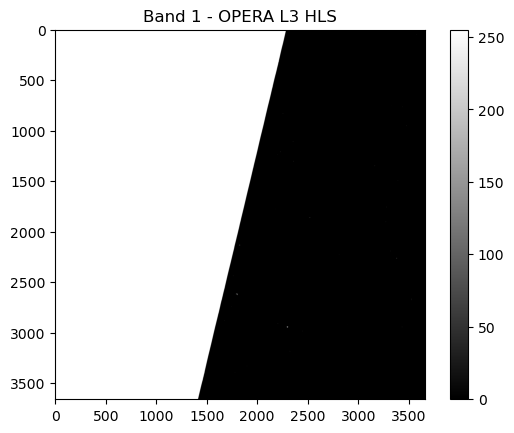

In [27]:
plt.imshow(band1, cmap='gray')
plt.title("Band 1 - OPERA L3 HLS")
plt.colorbar()
plt.show()
